# Support Vector Machines

Instead of the probabilistic interpretation (as in the case of logistic regression) of prediction confidence, we switch to a geometrical one: support vector machines assign higher confidence to samples that lie farther away from the separating hyperplane (notice that since we work with hyperplanes, the assumption once again is that points are linearly separable).

### Functional and geometric margins

For a hyperplane defined by a normal vector $w$ and a point $c$ lying on that plane, all points $x$ on the hyperplane satisfy the equation:

$$
w^T \cdot [x - c] = w^T \cdot x - w^T \cdot c = w^T \cdot x + b = 0
$$

where $b = -w^T \cdot c$ is defined as the bias parameter of the hyperplane.

For a point $\tilde{x}$ lying outside of a hyperplane in the direction matching the direction of the normal vector $w$, the old point $c$ on the hyperplane, and some specific point $\tilde{c}$ on the hyperplane that corresponds to point $\tilde{x}$, we can write the equation:

$$
[\tilde{x} - c] = [\tilde{c} - c] + k w
$$

where $[\tilde{c} - c]$ is a vector lying on the hyperplane and $[\tilde{x} - c]$ is vector connecting points $c$ and $\tilde{x}$ (and thus collinear to $w$) with $k > 0$:

$$
w^T \cdot [\tilde{x} - c] = w^T \cdot ([\tilde{c} - c] + k w) = w^T \cdot [\tilde{c} - c] + w^T \cdot kw = 0 + k w^T \cdot w = k w^T \cdot w > 0
$$

Thus, 
$$
w^T \cdot [\tilde{x} - c] = w^T \cdot \tilde{x} - w^T \cdot c = w^T \cdot \tilde{x} + b > 0
$$

All of this is to show that when plugging in points lying outside of the hyperplane in the direction matching the normal vector $w$ into the original hyperplane equation $w^T \cdot x + b$, we get values greater than 0. Analogously, we can show that for points lying outside of the hyperplane in the direction opposite the normal vector $w$ will give us negative results.

Intuitively, once we obtain the hyperplane, lying on one side of it or the other should classify the sample as either positive or negative class. How exactly should we decide which class should correspond to which side of the plane? Marking the positive class as 1 and negative as -1 (instead of 1 and 0), we assign a side that gives a positive result when applying $w^T \cdot x + b$ to the positive class and the other one to the negative. This way, we can define a new measure $\hat{\gamma}$ called functional margin as:

$$
\hat{\gamma}^{(i)} = y^{(i)}(w^Tx^{(i)} + b)
$$

which will always be positive for correct predictions and negative for the incorrect ones.

For a given dataset, we define $\hat{\gamma}$ as the smallest functional margin among all data points:
$$
\hat{\gamma} = \min_{i=1,\dots,n}\hat{\gamma}^{(i)}
$$

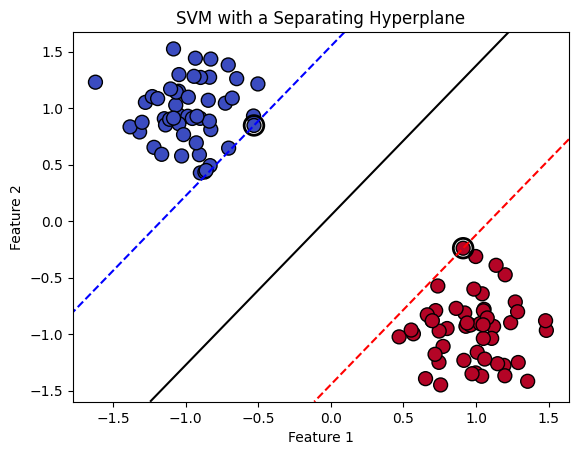

Let's now define the geometric margin. Again, taking an arbitrary point $\tilde{c}$ lying outside of the hyperplane in the direction matching the normal vector $w$, let's find a distance $\gamma^{(i)}$ from that point to the hyperplane defined as a length of the normal vector from the point to the hyperplane. For a point $c$ corresponding to a tail of the normal vector to point $\tilde{c}$ and a normal unit vector $\frac{w}{||w||}$

$$
[\tilde{c} - c] = \gamma^{(i)} \frac{w}{||w||}
$$

Obtaining the equation for point $c$:

$$
c = \tilde{c} - \gamma^{(i)} \frac{w}{||w||}
$$

and noticing that since it lies on the plane, we get:

$$
w^Tc + b = w^T\left(\tilde{c} - \gamma^{(i)} \frac{w}{||w||}\right) + b = 0
$$

Solving for $\gamma^{(i)}$, we obtain:

$$
\gamma^{(i)} = \left (\frac{w}{||w||}\right )^T \tilde{c} + \frac{b}{||w||}
$$

This is the derivation for a point belonging to a positive ($y = 1$) class. Analogously, the opposite of the result above could be obtained for a negative class.

Just like we did in the case of a functional margin, to obtain the values of the same sign for both classes, we multiply the distance value by the label and obtain the general definition of the geometric margin (notice the change of notation from point $\tilde{c}$ to $x^{(i)}$ to match the usual notation):

$$
\gamma^{(i)} = y^{(i)}\left(\left (\frac{w}{||w||}\right )^T x^{(i)} + \frac{b}{||w||}\right)
$$

Just as we did for the functional margin, we define $\gamma$ as the smallest geometric margin among all the points of a given dataset:

$$
\gamma = \min_{i=1,\dots,n}\gamma^{(i)}
$$

Comparing the definitions of functional $\hat{\gamma}^{(i)}$ and geometric $\gamma^{(i)}$ margins:

$$
\gamma^{(i)} = \frac{\hat{\gamma}^{(i)}}{||w||}
$$

which tells us that for $||w|| = 1$, the functional and geometric margins are equal.

Notice that the geometric margin is invariant to the rescaling of the parameters, and thus any arbitrary scaling constraint can be imposed on $w$ without changing the results, which makes it the primary optimization objective (the derivation is adapted from [Ng](https://cs229.stanford.edu/notes2022fall/main_notes.pdf)):

$$
max_{\hat{\gamma}, w, b} \quad \hat{\gamma} \\
\textrm{s.t.} \quad y^{(i)}(w^Tx^{(i)} + b) \geq \hat{\gamma}, \quad i = 1, \dots, n \\ \\
||w|| = 1
$$

the constraint $||w|| = 1$ is non-convex, which adds complexity on top of already complicated optimization task. Thus, we rewrite the geometric margin optimization objective in the following form:

$$
max_{\hat{\gamma}, w, b} \quad \frac{\hat{\gamma}}{||w||} \\
\textrm{s.t.} \quad y^{(i)}(w^Tx^{(i)} + b) \geq \hat{\gamma}, \quad i = 1, \dots, n \\ \\
$$

Now, since we are optimizing the geometric margin that is unaffected by the parameter scaling, we introduce the constraint on $||w||$ such that the functional margin with respect to the dataset is equal to 1:

$$
\hat{\gamma} = 1
$$

thus, allowing us to rewrite the problem as:

$$
max_{\hat{\gamma}, w, b} \quad \frac{1}{||w||} \\
\textrm{s.t.} \quad y^{(i)}(w^Tx^{(i)} + b) \geq 1, \quad i = 1, \dots, n \\ \\
$$

which is still a non-convex problem because of $\frac{1}{||w||}$. Notice that maximizing the inverse of a positive value is the same as minimizing the square of that value. Thus, we obtain the final statement of our optimization problem:

$$
min_{\hat{\gamma}, w, b} \quad \frac{1}{2}||w||^{2} \\
\textrm{s.t.} \quad y^{(i)}(w^Tx^{(i)} + b) \geq 1, \quad i = 1, \dots, n \\ \\
$$

We can use the method of Lagrange multipliers to solve this constrained optimizaion problem. Notice that we have $n$ analogous constraints:

$$
\quad y^{(i)}(w^Tx^{(i)} + b) \geq 1, \quad i = 1, \dots, n
$$

We want to show that in this case the Lagrangian will be defined as:

$$
L(w,b,\alpha) = \frac{1}{2}w^Tw - \sum_{i}\alpha_{i} (y^{(i)}(w^Tx^{(i)} + b) - 1)
$$

Let's start from the general derivation of Lagrangian for minimizing a function $f(x)$ subject to $m$ constraints:

$$
g_i(x) = 0, \quad i = 1, 2, \dots, m.
$$

where $x \in \mathbb{R}^n$, and the functions $f, g_1, \dots, g_m$ are continuously differentiable.

We define the feasible set as the set of all input values that satisfy the constraints:

$$
S = \{ x \in \mathbb{R}^n \mid g_i(x) = 0, \quad i = 1, \dots, m \}.
$$

We assume that $x^*$ is a local minimum of $f(x)$ on $S$.

The constraint functions $g_i(x) = 0$ define a constraint surface, and the tangent space to this surface at $x^*$ is spanned by the gradients $\nabla g_i(x^*)$ since gradients to constraint surfaces are always normal to their tangent spaces. That is, any movement from point $x^*$ along the lines $v$ tangent to the constraint surface will satisfy:

$$
\nabla g_i(x^*)^T v = 0, \quad i = 1, \dots, m.
$$

which implies that the valid directions $v$ lie in the null space of $[\nabla g_1(x^*)^T, \nabla g_2(x^*)^T, \dots, \nabla g_m(x^*)^T]$

Since $x^*$ is a local minimum subject to constraints, any small movement along the lines $v$ tangent to the constraint surface should not decrease $f(x)$. This means the directional derivative of $f(x)$ along any feasible direction $v$ must be zero:

$$
\nabla f(x^*)^T v = 0.
$$

which, in other words, means that the gradient of function $f(x)$ at $x^*$ must be orthogonal to every possible vector $v$ tangent to the constraint surface. We already know that valid directions $v$ lie in the null space of  $[\nabla g_1(x^*)^T, \nabla g_2(x^*)^T, \dots, \nabla g_m(x^*)^T]$. This implies that $\nabla f(x^*)$ must be expressible as a linear combination of the gradients of the constraints:

$$
\nabla f(x^*) = \sum_{i=1}^{m} \alpha_i \nabla g_i(x^*),
$$

for some scalars $\alpha_1, \dots, \alpha_m$.

Thus, we define the Lagrangian as

$$
\mathcal{L}(x, \alpha) = f(x) + \sum_{i=1}^{m} \alpha_i g_i(x).
$$

The necessary condition for an extremum is that the gradient of the Lagrangian must vanish:

$$
\nabla_x \mathcal{L}(x^*, \alpha) = \nabla f(x^*) + \sum_{i=1}^{m} \alpha_i \nabla g_i(x^*) = 0.
$$

The caveat here is that we have constraint inequalities instead of equations. Luckily, the Lagrange multiplier theorem states that the Lagrangian would be identical:

$$
\text{The problem of finding } x \text{ to} \\
\text{minimize } f(x) \text{ subject to } g(x) \leq 0 \\
\text{is equivalent to the problem of finding } arg \: min_{x} \: max_{p \in \mathbb{R}^{n+}} \: L(x, \alpha) \\
\text{where the Lagrangian L is defined as } L(x, \alpha) = f(x) +  \sum_{i=1}^{m} \alpha_i g_i(x)
$$

Our constraints look a little different:

$$
y^{(i)}(w^Tx^{(i)} + b) \geq 1
$$

To match the theorem, we transform them to get:

$$
y^{(i)}(w^Tx^{(i)} + b) -1 \geq 0 \\
-y^{(i)}(w^Tx^{(i)} + b) + 1 \leq 0
$$

which gives us

$$
L(w,b,\alpha) = \frac{1}{2}w^Tw + \sum_{i}\alpha_{i} (-y^{(i)}(w^Tx^{(i)} + b) + 1)
$$

or

$$
L(w,b,\alpha) = \frac{1}{2}w^Tw - \sum_{i}\alpha_{i} (y^{(i)}(w^Tx^{(i)} + b) - 1)
$$

as desired.

This optimization assumes a linearly separable dataset, where a functional margin of at least 1 for each point can be achieved. If it is not the case, the constraints are violated, and the solutions are not feasible.

To make the algorithm work for non-linearly separable datasets as well as be less sensitive to outliers, we reformulate our optimization (using $l_1$ regularization) as follows:

$$
\text{minimize } \frac{1}{2}||w||^2 + C\sum_{i=1}^{n}\xi_{i} \\
\text{ subject to } y^{(i)}(w^Tx^{(i)}+b) \geq 1 - \xi_{i} \text{, } i=1,\dots,n \\
\xi_{i} \geq 0 \text{, }i=1,\dots,n \\
$$


We can use Stochastic Gradient Descent optimizer that we are already familiar with in this case too. To do so, we want to devise a loss function in the following way:

We define a Hinge loss penalty:

$$
L_{i}^{hinge} (x^{i}, y^{i}) = max(0, 1 - y^{i}(w^Tx+b))
$$

This way, predictions that are correct but have a confidence less than 1, will get a small penalty, while totally incorrect predictions will get a larger one. In the meantime, correct predictions with high confidence will not be penalized at all.

Finally, we arrive at our complete loss function:

$$
L(w, b, \alpha) = \frac{1}{2}w^Tw + C\sum_{i}L_{i}^{hinge} = \frac{1}{2}||w||_{2}^{2} + C\sum_{i}L_{i}^{hinge}
$$

Let's apply this to the Iris flower dataset by creating a binary classificaiton problem with Virginica(2) defined as the positive class:

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SGDClassifier(loss='hinge', max_iter=1000, early_stopping=True, tol=1e-3, random_state=24))
])

svm_pipeline.fit(X_train, y_train)

y_pred = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"SGD Classifier on SVM test accuracy: {accuracy}")

SGD Classifier on SVM test accuracy: 0.9666666666666667
